# Polynomial Regression
## Fuel Consumption
EDX Machine Learning with Python: A Practical Introduction
Aaliyah Fiala
10/24/2020

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

In [7]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


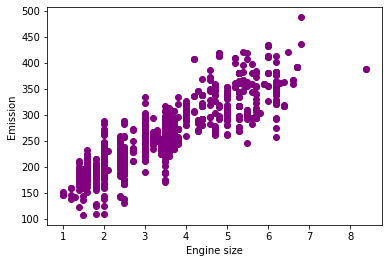

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [21]:
clf = linear_model.LinearRegression()

In [22]:
train_y_ = clf.fit(train_x_poly, train_y)

In [23]:
print ('Coeffecients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coeffecients:  [[ 0.         50.02969105 -1.44266673]]
Intercept:  [107.77745164]


In [36]:
print(clf.coef_[0, 1])
print(clf.intercept_[0])
3 ** 2

50.02969105448945
107.77745163805628


9

Text(0, 0.5, 'CO2 Emissions')

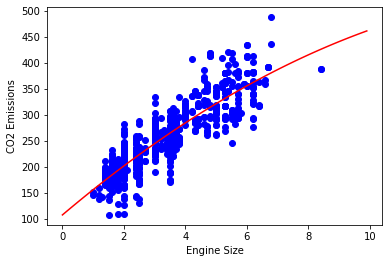

In [41]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0,1] * XX + clf.coef_[0,2] * np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [43]:
from sklearn.metrics import r2_score

In [45]:
test_x_poly = poly.fit_transform(test_x)
test_y_  = clf.predict(test_x_poly)

print("MAE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

MAE: 22.59
MSE: 917.70
R2-score: 0.69


In [47]:
poly = PolynomialFeatures(degree=3)
train_x_3_poly = poly.fit_transform(train_x)
poly3 = linear_model.LinearRegression()
train_y_3 = poly3.fit(train_x_3_poly, train_y)
print(poly3.coef_)

[[ 0.         28.37175966  4.47472192 -0.48689065]]


Text(0.5, 1.0, 'Degree-3 Polynomial Model')

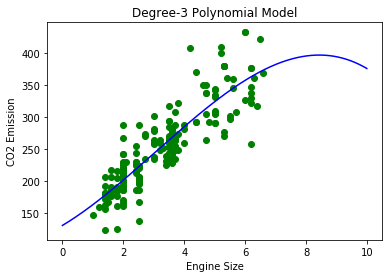

In [49]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color='green')
XX = np.arange(0.0, 10.0, 0.01)
yy = poly3.intercept_[0] + poly3.coef_[0,1]*XX + poly3.coef_[0,2]*np.power(XX, 2) + poly3.coef_[0,3]*np.power(XX,3)
plt.plot(XX, yy, '-b')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.title("Degree-3 Polynomial Model")

In [50]:
test_x_3_poly = poly.fit_transform(test_x)
test_y_3 = poly3.predict(test_x_3_poly)

In [51]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.59
Residual sum of squares (MSE): 917.70
R2-score: 0.69
